In [7]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import sympy as sp
import numpy as np
from scipy.optimize import fsolve
from sympy.utilities.lambdify import lambdify
sp.init_printing()

In [8]:
def u(x, k, t, h = 1, m = 1):
    return 1 / np.sqrt(np.pi * 2) * np.exp(1j * k * x) * np.exp(-1j * h * k**2 * t / (2 * m))

In [9]:
fig = plt.figure()
ax = plt.axes(xlim = (-5, 5), ylim = (-1, 1))
ax.grid(ls = '--')
line1, = ax.plot([], [], lw = 2)
line2, = ax.plot([], [], lw = 2)
dt = 0.01
xs = np.linspace(-5, 5, 1000)
k = -5
T = 4 * np.pi / k**2
plt.close()

def animate(i):
    line1.set_data(xs, u(xs, k, i * dt).real)
    line2.set_data(xs, u(xs, k, i * dt).imag)
    return line1, line2

anim = animation.FuncAnimation(fig, animate, frames=int(T / dt), interval=20, blit=True)
HTML(anim.to_html5_video())

$$\Psi(x, 0)=Ae^{-ax^2}$$

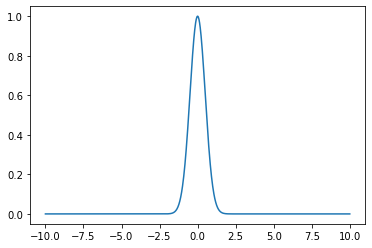

In [10]:
xs = np.linspace(-10, 10, 1000)
plt.plot(xs, np.exp(-2 * xs**2))

In [17]:
x = sp.Symbol('x', real = True)
t = sp.Symbol('t', real = True, positive = True)
a = sp.Symbol('a', real = True, positive = True)
h = sp.Symbol('hbar', real = True, positive = True)
m = sp.Symbol('m', real = True, positive = True)
A = sp.Symbol('A')
k = sp.Symbol('k', real = True)

In [12]:
Psi0 = A * sp.exp(-a*x**2)
Psi0

In [13]:
Psi0 * Psi0.conjugate()

In [14]:
sp.Abs(Psi0)**2

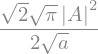

In [15]:
sp.integrate(sp.Abs(Psi0)**2, (x, -sp.oo, sp.oo))

$$A = \left(\frac{2a}{\pi}\right)^{\frac{1}{4}}$$

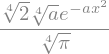

In [16]:
Psi0 = Psi0.subs(A, (2 * a / sp.pi)**sp.Rational(1, 4))
Psi0

# $$\tilde{\psi}(k) = (u_k, \Psi(x, t = 0)) $$

$$\Psi(x, t) = \int_{-\infty}^{+\infty} \tilde{\psi}(k) u_k(x) e^{-i\frac{\hbar k^2}{2m}t}dk$$

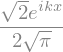

In [18]:
uk = 1 / (sp.sqrt(2 * sp.pi)) * sp.exp(sp.I * k * x)
uk

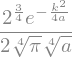

In [23]:
Psik = sp.integrate(uk.conjugate() * Psi0, (x, -sp.oo, sp.oo)).simplify()
Psik

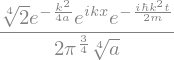

In [24]:
ff = Psik * uk * sp.exp(-sp.I * h * k**2 * t / (2 * m))
ff

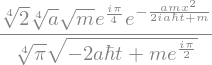

In [28]:
Psit = sp.integrate(ff, (k, -sp.oo, sp.oo), conds = 'none').simplify()
Psit

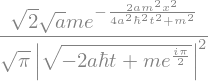

In [29]:
sp.Abs(Psit)**2

In [35]:
psit = lambdify((x, t, a), (sp.Abs(Psit)**2).subs({h: 1, m: 1}), modules = ['numpy', {'exp_polar': np.exp}])

In [36]:
psit(1, 1, 1)

In [39]:
xs = np.linspace(-5, 5, 100)
fig = plt.figure()
ax = plt.axes(xlim = (-5, 5), ylim = (0, 1))
line1, = ax.plot([], [], lw = 2)
line2, = ax.plot([], [], lw = 2)
dt = 0.01
plt.close()

def animate(i):
    line1.set_data(xs, psit(xs, dt * i, 1))
    line2.set_data(xs, np.sqrt(2 / np.pi) * np.exp(-2 * xs**2))
    return line1, line2

anim = animation.FuncAnimation(fig, animate, frames=800, interval=20, blit=True)
HTML(anim.to_html5_video())